# Weather in Honolulu, Hawaii

In [104]:
#Add dependencies
%matplotlib inline
from matplotlib import figure, style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
import calendar
from scipy import stats, mean
from scipy.stats import ttest_ind

## _Reflect Tables into SQLAlchemy ORM (Object Relational Mapper)_

In [2]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
#SQL Use Tool
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [4]:
#Reflect database into new model
Base = automap_base()

#Reflect the tables and pass in the engine
Base.prepare(engine, reflect=True)

In [5]:
#Find classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [6]:
#Label tables from classes
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
#Create a session and bind it to the engine
session = Session(engine)

In [8]:
#Start an inspect of engine to obtain data information
inspector = inspect(engine)

In [9]:
#List column names and types for class Station
data = inspector.get_columns('Station')
for stations in data:
    print(stations['name'], stations['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
#List column names and types for class Measurement
info = inspector.get_columns('Measurement')
for measures in info:
    print(measures['name'], measures['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


## Exploratory Climate Analysis

### _Most Recent 12 months of Precipitation Data_

In [11]:
#Find the most recent date
recent = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
recent

('2017-08-23')

In [12]:
#Find the date from 1 year/12 months/365 days ago
year = datetime.date(2017,8,23) - datetime.timedelta(days=365)
#print("Query Date: ", year)
year

datetime.date(2016, 8, 23)

In [13]:
#Find all dates and prcp within last 12 months
results = (session
           .query(Measurement.date,Measurement.prcp)
           .filter(Measurement.date >= year, Measurement.prcp != None)
           .all())
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 

In [14]:
#Place query results into a pandas dataframe by date
precipitation = pd.DataFrame(results,columns=['Date', 'Precipitation'])
shape = precipitation.set_index('Date')
organize = shape.sort_values(by ='Date')
organize

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


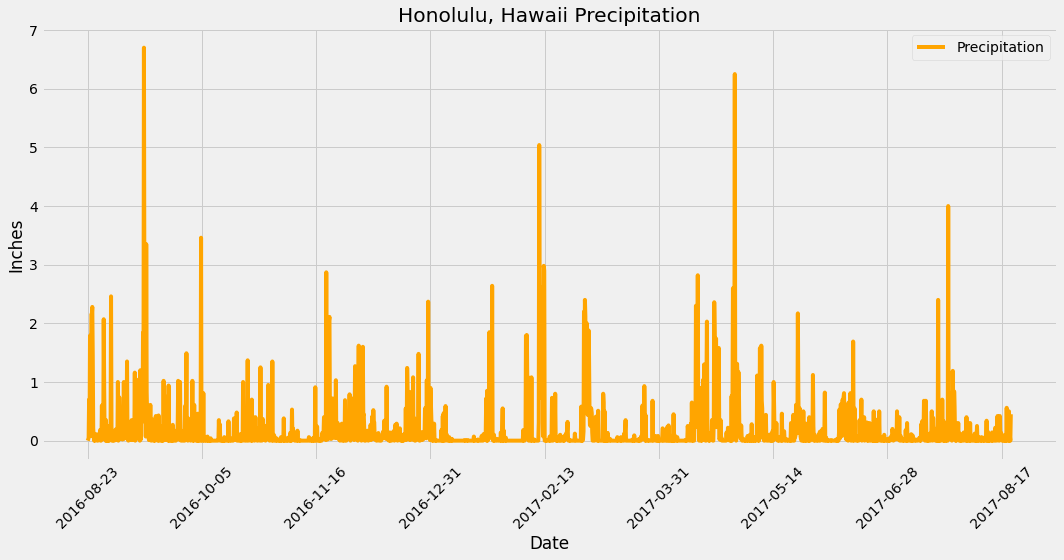

In [15]:
#Plot the precipitation date
organize.plot(figsize=(15,8), color='orange')
plt.title('Honolulu, Hawaii Precipitation')
plt.ylabel('Inches')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.savefig('All_Precipitation_Year_Plot.png')

In [16]:
#Find summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### _Station Analysis_


In [17]:
#Count the number of stations within the dataset
locations = session.query(Measurement.station).distinct().count()
locations

9

In [18]:
#List the stations based on frequency in dataset
activity = session.query(Measurement.station,func.count(Measurement.station))\
            .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
#Find the most active station based on frequency in dataset
most = session.query(Measurement.station,func.count(Measurement.station))\
            .group_by(Measurement.station)\
            .order_by(func.count(Measurement.station).desc()).first()       
most

('USC00519281', 2772)

In [20]:
#Grab most active station id
most_station = most[0]
most_station

'USC00519281'

In [21]:
#Find station name (Currently based on station id USC00519281)
most_name = session.query(Station.name).filter(Station.station == most_station).all()
#print(str(most_name))
most_name

[('WAIHEE 837.5, HI US')]

In [22]:
#Grab most active station name
name = most_name[0][0]
name

'WAIHEE 837.5, HI US'

In [23]:
#Find the lowest temp, highest temp, and average temp for most active station (Currently USC00519281)
temperature = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_station).order_by(func.min(Measurement.tobs)).all()
temperature

[(54.0, 85.0, 71.66378066378067)]

In [24]:
#Find all temperatures from within the last 12 months at the most active station (Currently USC00519281)
active = session.query(Measurement.tobs)\
        .filter(Measurement.date >= year, Measurement.station == most_station)\
        .order_by(Measurement.tobs).all()
active

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

In [25]:
#Place temperature observation data in a dataframe
observations = pd.DataFrame(active, columns=['Tobs'])
observations.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


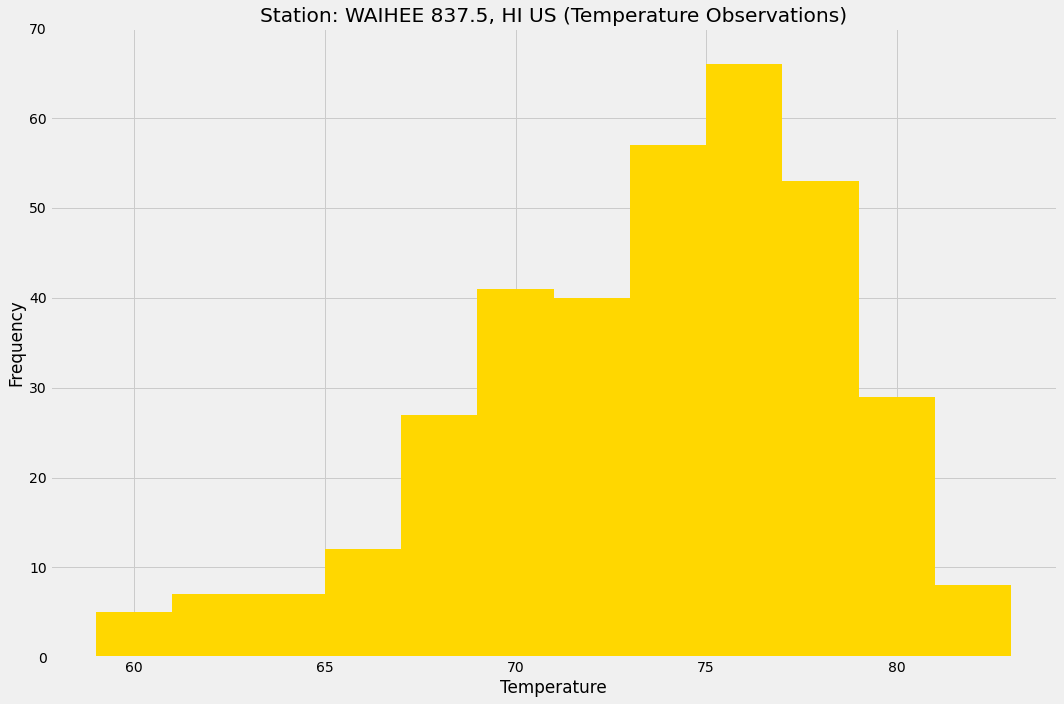

In [26]:
#Plot station temperature observations into a Histogram
plt.subplots(figsize=(15,10))
plt.hist(observations, bins= 12, color= 'gold')
plt.ylim(0,70)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Station: {name} (Temperature Observations)')
plt.tight_layout()
plt.savefig('Station_Temperature_All_Histogram.png')

## Further Analysis

### _Temperature Analysis I_

In [27]:
#Find and return temperature averages of all temperatures by station for comparison
by_station = session.query(Measurement.station,func.avg(Measurement.tobs))\
            .group_by(Measurement.station).order_by(func.avg(Measurement.tobs).desc()).all()
by_station

[('USC00514830', 74.8732970027248),
 ('USC00517948', 74.68440233236151),
 ('USC00519397', 74.55323054331865),
 ('USC00519523', 74.5436493068565),
 ('USC00518838', 72.72407045009784),
 ('USC00513117', 72.68918420081211),
 ('USC00519281', 71.66378066378067),
 ('USC00511918', 71.61596766043456),
 ('USC00516128', 70.91500765696784)]

In [28]:
#Find and return temperature average for all temperatures by station with a month filter
def station_average (month):
    
    return (session.query(Measurement.station,func.avg(Measurement.tobs))
                    .filter(func.strftime("%m", Measurement.date)== month)
                    .group_by(Measurement.station)
                    .order_by(func.avg(Measurement.tobs).desc()).all())

In [29]:
#Find and return temperature averages of all temperatures in June by station
june = station_average("06")
#print(station_average("06"))
june

[('USC00519397', 77.55932203389831),
 ('USC00519523', 76.66810344827586),
 ('USC00517948', 76.6554054054054),
 ('USC00514830', 76.00537634408602),
 ('USC00511918', 74.13939393939394),
 ('USC00513117', 74.05084745762711),
 ('USC00518838', 73.39473684210526),
 ('USC00519281', 73.27118644067797),
 ('USC00516128', 71.9372197309417)]

In [30]:
#Find and return temperature averages of all temperatures in December by station
december = station_average("12")
#print(station_average("12"))
december

[('USC00514830', 73.2247191011236),
 ('USC00519523', 72.43333333333334),
 ('USC00518838', 72.42105263157895),
 ('USC00517948', 71.8348623853211),
 ('USC00519397', 71.10952380952381),
 ('USC00513117', 71.06944444444444),
 ('USC00519281', 69.90322580645162),
 ('USC00511918', 69.6842105263158),
 ('USC00516128', 69.29126213592232)]

In [31]:
#Grab all temperature averages of stations with a dataset filter
def all_averages (all_month):

    average_month = []

    for index, tuple in enumerate(all_month):
        average_month.append(tuple[1])
    
    return average_month

In [32]:
#Grab all temperature averages of stations for June data 
june_avg = all_averages(june)
june_avg

[77.55932203389831,
 76.66810344827586,
 76.6554054054054,
 76.00537634408602,
 74.13939393939394,
 74.05084745762711,
 73.39473684210526,
 73.27118644067797,
 71.9372197309417]

In [33]:
#Grab all temperature averages of stations for December data 
december_avg = all_averages(december)
december_avg

[73.2247191011236,
 72.43333333333334,
 72.42105263157895,
 71.8348623853211,
 71.10952380952381,
 71.06944444444444,
 69.90322580645162,
 69.6842105263158,
 69.29126213592232]

In [34]:
#Unpaired (independent) t-test
stats.ttest_ind(december_avg, june_avg)

Ttest_indResult(statistic=-4.615865424404701, pvalue=0.00028626292761018595)

In [35]:
#Paired (relative) t-test
stats.ttest_rel(december_avg, june_avg)

Ttest_relResult(statistic=-17.003165938723054, pvalue=1.4530971041972015e-07)

#### The paired t-test is correct because both the June and December datasets have an equal number of data points and each is matched by station ids in both month datasets.

#### The pvalue of 1.4530971041972015e-07 is statistically significant, because is it greater than 0.05.

### _Temperature Analysis II_

In [36]:
#Find and return the minimum, average, and maximum temperatures for date range
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return (session.query(func.min(Measurement.tobs), 
                         func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs))
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())

In [37]:
#Results for date range test
starter = (calc_temps('2012-02-28', '2012-03-05'))
#print(calc_temps('2012-02-28', '2012-03-05'))
starter

[(62.0, 69.57142857142857, 74.0)]

In [38]:
#Results for actual date range
all_year = (calc_temps('2016-08-23', '2017-08-23'))
#print(calc_temps('2016-08-23', '2017-08-23'))
all_year

[(58.0, 74.59058295964125, 87.0)]

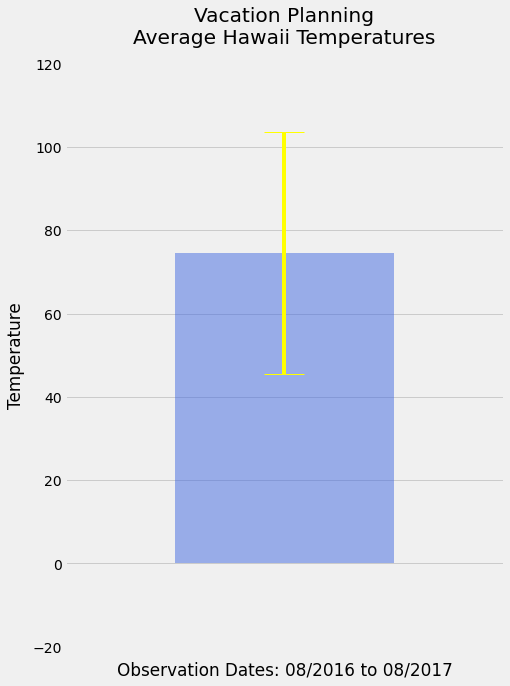

In [39]:
#Plot min, avg, and max temperature for most recent year temperature data by using max-min for y error bar (YERR)
hawaii = pd.DataFrame(all_year, columns=['Min Temp','Avg Temp','Max Temp'])
vacayplan_avg = hawaii['Avg Temp']
avg_range = hawaii.iloc[0]['Max Temp'] - hawaii.iloc[0]['Min Temp']
vacayplan_avg.plot(kind= 'bar',yerr=avg_range, figsize=(7,10),
                   alpha = 0.5,
                   color='royalblue',
                   ecolor="yellow",
                   capsize=20)
plt.ylim(-20,120)
plt.xticks([])
plt.title("Vacation Planning\nAverage Hawaii Temperatures", pad=20)
plt.ylabel("Temperature", labelpad=7)
plt.xlabel("Observation Dates: 08/2016 to 08/2017", labelpad = 14)
#plt.grid(True)
plt.savefig("All_Temperature_Summary_ErrorBar.png")

#### Formatted for with specific variables using errorbar: peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [40]:
#Grab min, average, max
tmin = all_year[0][0]
final_avg = all_year[0][1]
tmax = all_year[0][2]
peak_to_peak = (tmax-tmin)

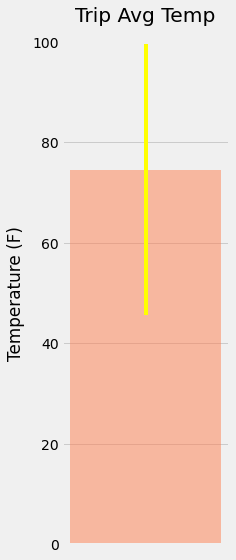

In [41]:
#Plot min, avg, and max temperature with specific format
plt.figure(figsize=(3.5,8))
plt.bar(1, final_avg, color = 'coral', alpha = 0.5)
plt.errorbar(1, final_avg, yerr= (peak_to_peak),color = 'yellow')
plt.ylim(0, 100)
plt.xticks([])
plt.title('Trip Avg Temp', pad=20)
plt.ylabel("Temperature (F)", labelpad=7)
plt.tight_layout()
plt.savefig("All_Temperature_Formatted_ErrorBar.png")

#### _Daily Rainfall Average_

In [42]:
#Find and return total prcp/rainfall by station for trip dates with station name, latitude, longitude, and elevation
def prcp_total (trip_start, trip_end):

    return (session.query(Measurement.station,func.sum(Measurement.prcp),
                         Station.name,Station.latitude, Station.longitude, Station.elevation)
                .filter(Measurement.station == Station.station)        
                .filter(Measurement.date >= trip_start)
                .filter(Measurement.date <= trip_end)
                .group_by(Measurement.station,Station.name,Station.latitude, Station.longitude, Station.elevation)
                .order_by(func.sum(Measurement.prcp).desc()).all())

In [43]:
#Results for trip dates
prcp_stations = (prcp_total('2016-08-28', '2016-09-03'))

In [44]:
#Format trip dates rainfall data into a dataframe
trip = pd.DataFrame(prcp_stations, columns=['Station ID','Total Rainfall','Name','Latitude','Longitude','Elevation'])
trip

,Station ID,Total Rainfall,Name,Latitude,Longitude,Elevation
0,USC00516128,6.52,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,1.34,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,0.50,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,0.47,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,0.37,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519397,0.14,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00517948,0.02,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [95]:
#Find and calculate daily normals of temperature minimum, average, and maximum
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.min(Measurement.tobs), 
                          func.avg(Measurement.tobs), 
                          func.max(Measurement.tobs))
                   .filter(func.strftime("%m-%d", Measurement.date) == date)
                   .all())

daily_normals(vacay_dates)

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 1 - probably unsupported type.
[SQL: SELECT min(measurement.tobs) AS min_1, avg(measurement.tobs) AS avg_1, max(measurement.tobs) AS max_1 
FROM measurement 
WHERE strftime(?, measurement.date) = ?]
[parameters: ('%m-%d', Index(['08-28', '08-29', '08-30', '08-31', '09-01', '09-02', '09-03'], dtype='object'))]
(Background on this error at: http://sqlalche.me/e/13/rvf5)

In [100]:
# 
trip_dates = pd.date_range(start='8/28/2016', end='9/03/2016')
#print(str(trip_dates.strftime('%m-%d')))
#print(trip_dates.date())
vacay_dates = trip_dates.strftime('%m-%d')
vacay_dates

Index(['08-28', '08-29', '08-30', '08-31', '09-01', '09-02', '09-03'], dtype='object')

In [96]:
#
clean_dates = pd.Series(index=vacay_dates)
clean_dates

<ipython-input-96-5891bcaa8463>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  clean_dates = pd.Series(index=vacay_dates)


08-28   NaN
08-29   NaN
08-30   NaN
08-31   NaN
09-01   NaN
09-02   NaN
09-03   NaN
dtype: float64

In [105]:
for date in datetime_range(start=datetime(2016, 8, 28), end=datetime(2016, 9, 3)):
    print(date)

NameError: name 'datetime_range' is not defined

In [ ]:
#dates = trip_dates.to_pydatetime()
#for dates in trip_dates:
#print(dates().strftime('%m-%d'))
#normals =[]
    #normals.append(trip_dates.strftime('%m-%d'))
normals = append(trip_dates.strftime('%m-%d'))
normals

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`